# 序列构成的数组
> 你可能注意到了，之前提到的几个操作可以无差别地应用于文本、列表和表格上。  
> 我们把文本、列表和表格叫作数据火车……FOR 命令通常能作用于数据火车上。  
> ——Geurts、Meertens 和 Pemberton  
>   *ABC Programmer’s Handbook*

## 内置序列类型概览

* 容器序列  
    `list`、`tuple` 和 `collections.deque` 这些序列能存放不同类型的数据。
* 扁平序列  
    `str`、`bytes`、`bytearray`、`memoryview` 和 `array.array`，这类序列只能容纳一种类型。
   
容器序列存放的是它们所包含的任意类型的对象的**引用**，而扁平序列里存放的**是值而不是引用**。换句话说，扁平序列其实是一段连续的内存空间。由此可见扁平序列其实更加紧凑，但是它里面只能存放诸如字符、字节和数值这种基础类型。

序列类型还能按照能否被修改来分类。
* 可变序列  
    `list`、`bytearray`、`array.array`、`collections.deque` 和 `memoryview`。
* 不可变序列  
    `tuple`、`str` 和 `bytes`
    
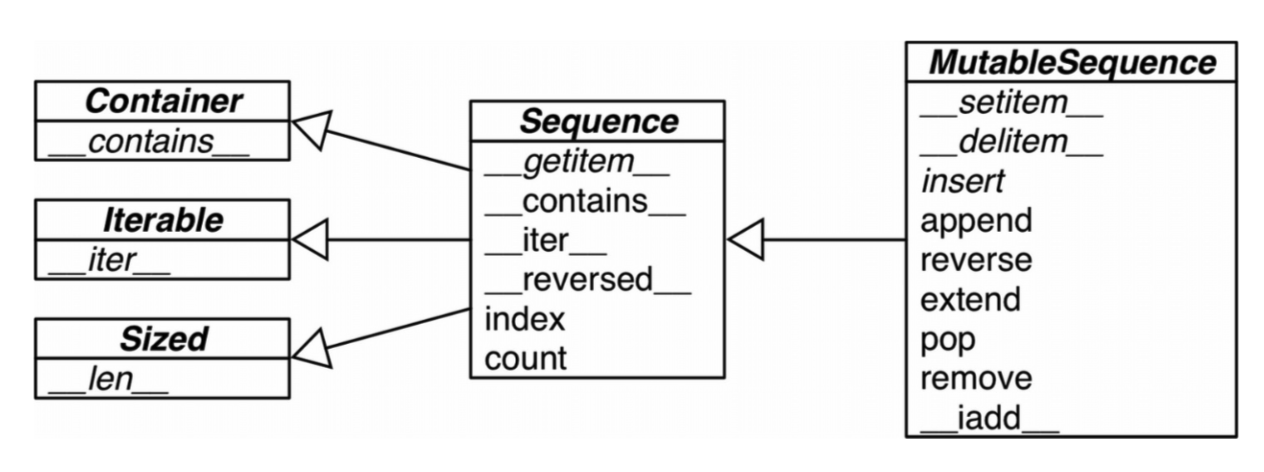

## 列表推导和生成器表达式

### 列表推导和可读性
列表推导是构建列表(list)的快捷方式，生成器表达式用来穿件其他任何类型的序列。

In [ ]:
# 比较两段代码
symbols = 'abcde'
# 1
codes = []
for symbol in symbols:
    codes.append(ord(symbol))    
print(codes)
# 2
codes = [ord(symbol) for symbol in symbols]
print(codes)

列表推导能够提升可读性。
只用列表推导来创建新的列表，并尽量保持简短（不要超过一行）

###  列表推导同 filter 和 map 的比较

In [3]:
symbols = 'abcde'

beyond_ascii = [ord(s) for s in symbols if ord(s) > 100]
print(beyond_ascii)

beyond_ascii = list(filter(lambda c: c > 100, map(ord, symbols)))
print(beyond_ascii)

[101]
[101]


### 笛卡尔积

In [6]:
colors = ['black', 'white'] 
sizes = ['S', 'M', 'L']

tshirts = [(color, size) for color in colors 
                         for size in sizes]
print(tshirts)

tshirts = [(color, size) for size in sizes
                         for color in colors]
print(tshirts)
# 注意顺序是依照 for-loop

[('black', 'S'), ('black', 'M'), ('black', 'L'), ('white', 'S'), ('white', 'M'), ('white', 'L')]
[('black', 'S'), ('white', 'S'), ('black', 'M'), ('white', 'M'), ('black', 'L'), ('white', 'L')]


### 生成器表达式

列表推导与生成器表达式的区别：
- 生成器表达式遵守实现了迭代器接口，可以逐个地产出元素。列表推导是先建立一个完整的列表，再将这个列表传递到构造函数里。
- 语法上近似，方括号换成圆括号

In [ ]:
# symbols = 'abcde'
print(tuple(ord(symbol) for symbol in symbols))

import array
print(array.array('I', (ord(symbol) for symbol in symbols)))

- 如果生成器表达式是一个函数调用过程中的唯一参数，则不需要额外括号
- 生成器会在 for-loop 运行时才生成一个组合。逐个产出元素

In [16]:
colors = ['black', 'white'] 
sizes = ['S', 'M', 'L']

for tshirt in ('%s %s' %(c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


## 元祖不仅仅是不可变的列表

### 元祖与记录

- 元祖是对数据的记录
- 元祖的位置信息为数据赋予了意义。对元祖内元素排序，位置信息将丢失

In [18]:
# LA 国际机场经纬度
lax_coordinates = (33.9425, -118.408056)
# 城市，年份，人口（单位：百万），人口变化（单位：百分比），面积
city, year, pop, chg, area = ('Tokyo', 2003, 32450, 0.66, 8014)
# country_code, passport number
traveler_ids = [('USA', '31195855'), ('BBA', 'CE342567'), ('ESP', 'XDA205856')]

for passport in sorted(traveler_ids):
    print('%s%s' % passport)

# 拆包（unpacking）
for country, _ in traveler_ids:
    print(country)

BBACE342567
ESPXDA205856
USA31195855
USA
BBA
ESP


### 元祖拆包

- 平行赋值

In [19]:
lax_coordinates = (33.9425, -118.408056)
# 元祖拆包
latitude, longtitude = lax_coordinates
print(latitude)
print(longtitude)

33.9425
-118.408056


- 交换变量值，不使用中间变量

In [20]:
a = 3
b = 4
b, a = a, b
print(a)
print(b)

4
3


- `*` 运算符，把一个可迭代对象拆开作为函数参数

In [21]:
divmod(20, 8)

t = (20, 8)
divmod(*t)

quotient, remainder = divmod(*t)
print(quotient)
print(remainder)

2
4


- 函数用元祖形式返回多个值
> _ 用作占位符，可以用来处理不需要的数据

In [22]:
import os

_, filename = os.path.split('/home/xiao/.ssh/id_rsa.pub')
print(filename)

id_rsa.pub


- 用`*` 处理省下的元素

In [1]:
a, b, *rest = range(5)
print(a, b, rest)

a, b, *rest = range(3)
print(a, b, rest)

a, b, *rest = range(2)
print(a, b, rest)

# * 前缀只能用在一个变量前，该变量可出现在赋值表达式中任意位置
a, *body, c, d = range(5)
print(a, body, c, d)

*head, b, c, d = range(5)
print(head, b, c, d)

0 1 [2, 3, 4]
0 1 [2]
0 1 []
0 [1, 2] 3 4
[0, 1] 2 3 4


### 嵌套元祖拆包


In [2]:
metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),   # <1>
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas:  # <2>
    if longitude <= 0:  # <3>
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


将元祖作为记录仍缺少一个功能：字段命名

### 具名元祖(numedtuple)

`collections.namedtuple` 是一个工厂函数，用来构建带字段名的元祖和一个有名字的

> namedtuple 构建的类的实例所消耗的内存和元祖是一样的，因为字段名都存在对应的类里。
> 实例和普通的对象实例小一点，因为 Python 不会用 `__dict__` 存放实例的属性

In [6]:
from collections import namedtuple

# 需要两个参数，类名和类各个字段的名字
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 129.691667))
print(tokyo)
print(tokyo.population)
print(tokyo.coordinates)

City(name='Tokyo', country='JP', population=36.933, coordinates=(35.689722, 129.691667))
36.933
(35.689722, 129.691667)


`namedtuple` 除了从普通元祖继承的属性外，还有一些专有属性。
常用的有：
- `_fields` 类属性
- `_make(iterable)` 类方法
- `_asdict()` 实例方法

In [15]:
print(City._fields)
LatLong = namedtuple('LatLong', 'lat long')
delhi_data = ('Delhi NCR', 'IN', 21.935, LatLong(28.613889, 77.208889))
delhi = City._make(delhi_data)
print(delhi._asdict())

for key, value in delhi._asdict().items():
    print(key + ':', value)

('name', 'country', 'population', 'coordinates')
OrderedDict([('name', 'Delhi NCR'), ('country', 'IN'), ('population', 21.935), ('coordinates', LatLong(lat=28.613889, long=77.208889))])
name: Delhi NCR
country: IN
population: 21.935
coordinates: LatLong(lat=28.613889, long=77.208889)


### 作为不可变列表的元祖

对比列表和元祖的方法
// 插入表格

结论：
- 除了增减元素相关的方法和`__reversed__` 外，元祖支持列表的其他所有方法。

## 切片
在 Python 里, 列表（list），元祖（tuple）和字符串（str）这类序列类型都支持切片操作

### 为什么切片的区间会忽略最后一个元素

- Python 以0 作为起始下标
- 当只有后一个位置信息时，可以快速导出切片和区间的元素数量
- 当起止位置信息课件是，可以快速计算出切片和区间的长度 （stop - start）
- 可利用任意一个下标把序列分割成不重叠的两部分。`my_list[:x]` `my_list[x:]`

In [ ]:
### 对对象进行切片

- 可以通过 s[a:b:c] 的形式对 s 在 a 和 b 区间以 c 为间隔取值

In [16]:
s = 'bicycle'
print(s[::3])
print(s[::-1])
print(s[::-2])

bye
elcycib
eccb


### 多维切片和省略

`[]` 运算符可以使用以逗号分开的多个索引或切片。

如 `a[i, j]`，`a[m:n, k:1]`得到二维切片

要正确处理`[]` 运算符，对象的特殊方法 `__getitem__`，`__setitem__` 需要以元祖的形式来接受 `a[i, j]`的索引。

### 给切片赋值

切片放在赋值语句左边，或作为 del 操作对象，可以对序列进行嫁接、切除或就地修改

In [4]:
l = list(range(10))
print(l)

l[2:5] = [20, 30]
print(l)

del l[5:7]
print(l)

l[3::2] = [11, 22]
print(l)

# l[2:5] = 100 WRONG

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 20, 30, 5, 6, 7, 8, 9]
[0, 1, 20, 30, 5, 8, 9]
[0, 1, 20, 11, 5, 22, 9]


## 对序列使用 + 和 * 

- `+` 和 `*` 不修改原有的操作对象，而是构建一个新的序列

In [5]:
l = [1, 2, 3]
print(l * 5)

print(5 * 'abcd')

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
abcdabcdabcdabcdabcd


### 建立由列表组成的列表
> a * n，如果在序列 a 中存在对其他可变变量的引用的话，得到的序列中包含的是 n 个对指向同一地址的引用 

In [10]:
board = [['_'] * 3 for i in range(3)]
# 换一种形式
# board = []
# for i in range(3):
#     row = ['_'] * 3
#     board.append(row)
print(board)
board[1][2] = 'X'
print(board)

    
# weird_board = [['_'] * 3] * 3
# 换一种形式
weird_board = []
row = ['_'] * 3
for i in range(3):
    weird_board.append(row)
weird_board[1][2] = 'O'
# 会发现 3 个指向同一列表的引用
print(weird_board)



[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]
[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]
[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]


## 序列的增量赋值 +=、*=

- `+=` 背后的特殊方法是 `__iadd__` 方法，没有则退一步调用 `__add__`
- 同理 `*=` 的特殊方法是 `__imul__`

In [16]:
l = [1, 2, 3]
print(id(l))

l *= 2
print(l)
# 列表ID 无改变
print(id(l))

t = (1, 2, 3)
print(id(t))
t *= 2
print(t)
# 新元祖被创建
print(id(t))

4534358344
[1, 2, 3, 1, 2, 3]
4534358344
4536971408
(1, 2, 3, 1, 2, 3)
4546754024


## list.sort方法和内置函数sorted

- list.sort 会就地排序列表，方法返回值为 None
- sorted 会新建一个列表作为返回值
- 两个方法都有 reverse 和 key 作为可选的关键字参数
    reserve 为 True 时，降序输出。默认为 false
    key 只有一个参数的函数，将被用在序列的每一个元素上，其结果作为排序算法依赖的对比关键字
    


## 用bisect管理已排序的序列

bisect 模块有两个主要函数：
- bisect
- insort
都利用二分查找法来在有序序列中查找或插入人元素

### 用 bisect 来搜索

bisect(haystack, needle) 默认为升序，haystack 需要保持有序。
使用方法：
bisect(index, needle) 查找位置 index，再使用 haystack.insert(index, needle) 插入新值

也可以用 insort 来一步到位，且后者速度更快

In [18]:
# BEGIN BISECT_DEMO
import bisect
import sys

HAYSTACK = [1, 4, 5, 6, 8, 12, 15, 20, 21, 23, 23, 26, 29, 30]
NEEDLES = [0, 1, 2, 5, 8, 10, 22, 23, 29, 30, 31]

ROW_FMT = '{0:2d} @ {1:2d}    {2}{0:<2d}'

def demo(bisect_fn):
    for needle in reversed(NEEDLES):
        position = bisect_fn(HAYSTACK, needle)  # <1>
        offset = position * '  |'  # <2>
        print(ROW_FMT.format(needle, position, offset))  # <3>

if __name__ == '__main__':

    if sys.argv[-1] == 'left':    # <4>
        bisect_fn = bisect.bisect_left
    else:
        bisect_fn = bisect.bisect

    print('DEMO:', bisect_fn.__name__)  # <5>
    print('haystack ->', ' '.join('%2d' % n for n in HAYSTACK))
    demo(bisect_fn)

# END BISECT_DEMO

DEMO: bisect_right
haystack ->  1  4  5  6  8 12 15 20 21 23 23 26 29 30
31 @ 14      |  |  |  |  |  |  |  |  |  |  |  |  |  |31
30 @ 14      |  |  |  |  |  |  |  |  |  |  |  |  |  |30
29 @ 13      |  |  |  |  |  |  |  |  |  |  |  |  |29
23 @ 11      |  |  |  |  |  |  |  |  |  |  |23
22 @  9      |  |  |  |  |  |  |  |  |22
10 @  5      |  |  |  |  |10
 8 @  5      |  |  |  |  |8 
 5 @  3      |  |  |5 
 2 @  1      |2 
 1 @  1      |1 
 0 @  0    0 


### Array
> 虽然列表既灵活又简单，但面对各类需求时，我们可能会有更好的选择。比如，要存放 1000 万个浮点数的话，数组（array）的效率要高得多，因为数组在背后存的并不是 float 对象，而是数字的机器翻译，也就是字节表述。这一点就跟 C 语言中的数组一样。再比如说，如果需要频繁对序列做先进先出的操作，deque（双端队列）的速度应该会更快。

`array.tofile` 和 `fromfile` 可以将数组以二进制格式写入文件，速度要比写入文本文件快很多，文件的体积也小。

> 另外一个快速序列化数字类型的方法是使用 pickle（https://docs.python.org/3/library/pickle.html）模块。pickle.dump 处理浮点数组的速度几乎跟array.tofile 一样快。不过前者可以处理几乎所有的内置数字类型，包含复数、嵌套集合，甚至用户自定义的类。前提是这些类没有什么特别复杂的实现。

array 具有 `type code` 来表示数组类型：具体可见 [array 文档](https://docs.python.org/3/library/array.html).

### memoryview
> memoryview.cast 的概念跟数组模块类似，能用不同的方式读写同一块内存数据，而且内容字节不会随意移动。

In [ ]:
import array

arr = array.array('h', [1, 2, 3])
memv_arr = memoryview(arr)
# 把 signed short 的内存使用 char 来呈现
memv_char = memv_arr.cast('B') 
print('Short', memv_arr.tolist())
print('Char', memv_char.tolist())
memv_char[1] = 2  # 更改 array 第一个数的高位字节
# 0x1000000001
print(memv_arr.tolist(), arr)
print('-' * 10)
bytestr = b'123'
# bytes 是不允许更改的
try:
    bytestr[1] = '3'
except TypeError as e:
    print(repr(e))
memv_byte = memoryview(bytestr)
print('Memv_byte', memv_byte.tolist())
# 同样这块内存也是只读的
try:
    memv_byte[1] = 1
except TypeError as e:
    print(repr(e))


### Deque
`collections.deque` 是比 `list` 效率更高，且**线程安全**的双向队列实现。

除了 collections 以外，以下 Python 标准库也有对队列的实现：
* queue.Queue (可用于线程间通信)
* multiprocessing.Queue (可用于进程间通信)
* asyncio.Queue
* heapq